# &#127909; Intro Of This NoteBook:
 This notebook uses a dataset from the [MovieLens 20M Dataset](https://www.kaggle.com/grouplens/movielens-20m-dataset). We will describe the dataset further as we explore with it using pandas.


![Imgur](https://i.imgur.com/sO3hkdl.png)

# &#128279; Code Library, Style, and Links 

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:lightblue;}      
</style>

Useful `LINKS`:

&#128187; 1. [MovieLens 20M Dataset Research Paper](http://files.grouplens.org/papers/harper-tiis2015.pdf)

&#128187; 2. [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

&#128187; 3. [Pandas Official Site](https://pandas.pydata.org)

# &#128203; Introduction of MoveLens:
This is a report on the movieLens dataset available here. MovieLens itself is a research site run by GroupLens Research group at the University of Minnesota. The first automated recommender system was developed there in 1993.

# &#128221; Dataset Description:
The dataset is available in several snapshots. The ones that were used in this analysis were Latest Datasets - both full and small (for web scraping). They were last updated in October 2016.



# &#128214; Definitions of Pandas:
Pandas is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python.

Pandas build upon numpy and scipy providing easy-to-use data structures and data manipulation functions with integrated indexing.

* The main data structures pandas provides are Series and DataFrames.

![Imgur](https://i.imgur.com/L9GESTT.jpg)

 # &#128204; Getting Started
 To get started, we will need to; Please note that you will need to download the dataset. 
 
 Here are the links to the data source and location:
 
* ** Data Source:** Kaggle Data Science Home (filename: movelens-20m-dataset.zip)
* **Location:** https://www.kaggle.com/grouplens/movielens-20m-dataset

# &#128229; Import Libraries

In [3]:
import pandas as pd

# &#128197; Read the Dataset
In this notebook, we will be using three CSV files:

* **ratings.csv :** userId,movieId,rating, timestamp

* **tags.csv : **userId,movieId, tag, timestamp

* **movies.csv : **movieId, title, genres 

In [4]:
movies = pd.read_csv(r'E:\MovieLens 20M Dataset Data Sources/movie.csv', sep=',')
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
tags = pd.read_csv('E:\MovieLens 20M Dataset Data Sources/tag.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [6]:
ratings = pd.read_csv('E:\MovieLens 20M Dataset Data Sources/rating.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


* For current analysis, we will remove timestamp

In [7]:
del ratings['timestamp']
del tags['timestamp']

# &#128230; Data Structures:

## &#128678; Series

In [8]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [9]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [10]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [11]:
row_0['userId']

18

In [12]:
'rating' in row_0

False

In [13]:
row_0.name

0

In [14]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

# &#9641; DataFrames

In [15]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [16]:
# What is the index of a DF?
# The index of a DataFrame is a series of labels that identify each row. The labels can be integers, strings, or any other hashable type. The index is used for label-based access and alignment, and can be accessed or modified using this attribute.

In [17]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [18]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [ ]:
# What is ILOC () in Python?
# iloc() Function in Python
# It stands for "integer location" and is primarily used for accessing and retrieving data from pandas DataFrame objects using integer-based indexing. The iloc() function allows you to access specific rows and columns of a DataFrame by providing the integer-based indices.

In [ ]:
What is a LOC in python?
# The . loc property of the DataFrame object allows the return of specified rows and/or columns from that DataFrame . It can do so using a label or label(s), or a boolean array of the same size as the axis being filtered.

In [ ]:
What is LOC and ILOC?
# Loc and iloc are two functions in Pandas that are used to slice a data set in a Pandas DataFrame. The function . loc is typically used for label indexing and can access multiple columns, while . iloc is used for integer indexing.

In [19]:
tags.iloc[ [0,11,500] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


# &#128200; &#128201; Descriptive Statistics 
Let's look how the ratings are distributed!

In [20]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [21]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [22]:
ratings['rating'].mean()

3.5255285642993797

In [23]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [24]:
ratings['rating'].min()

0.5

In [25]:
ratings['rating'].max()

5.0

In [26]:
ratings['rating'].std()

1.051988919275684

In [27]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [28]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [29]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [30]:
filter2 = ratings['rating'] > 0
filter2.all()

True

# &#128295; Data Cleaning: Handling Missing Data

In [31]:
movies.shape

(27278, 3)

In [32]:
movies.isnull().any().any()

False

* Thats nice ! No NULL values !

In [33]:
ratings.shape

(20000263, 3)

In [34]:
ratings.isnull().any().any()

False

* Thats nice ! No NULL values !

In [35]:
tags.shape

(465564, 3)

In [36]:
tags.isnull().any().any()

True

In [37]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

* We have some tags which are NULL.

In [38]:
tags=tags.dropna()
tags

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [39]:
tags.isnull().any().any()

False

In [40]:
tags.shape

(465548, 3)

* Thats nice ! No NULL values ! Notice the number of lines have reduced.

# &#128202; Data Visualization

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

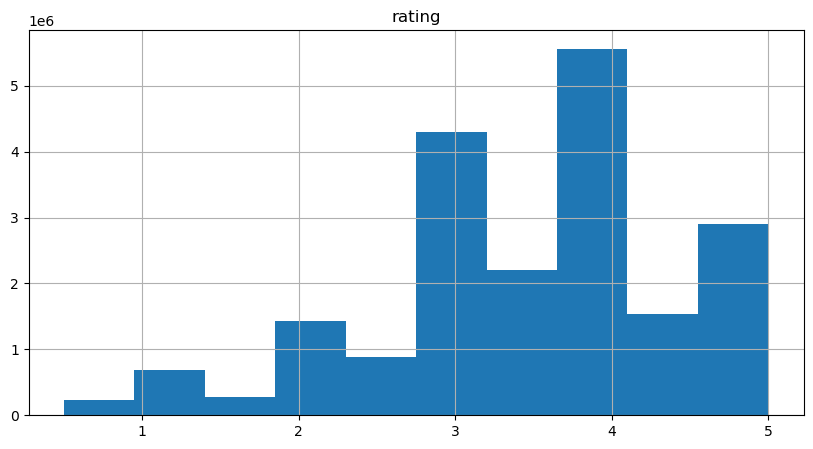

In [41]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

<Axes: >

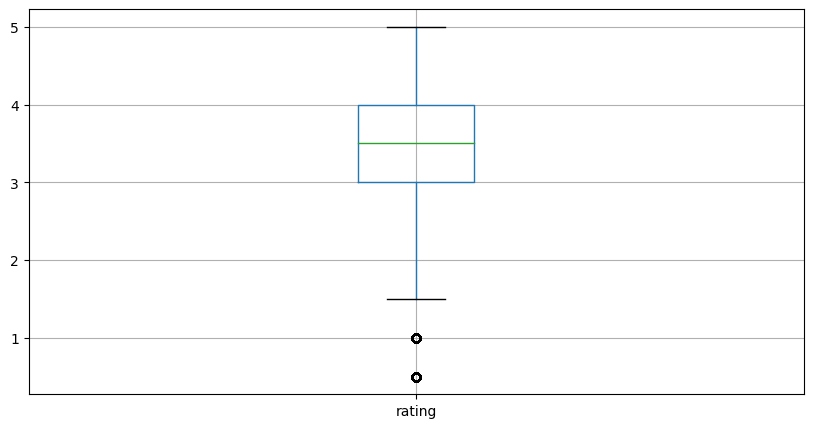

In [42]:
ratings.boxplot(column='rating', figsize=(10,5))

# &#128228; Slicing Out Columns

In [44]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [45]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [46]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [47]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<Axes: xlabel='tag'>

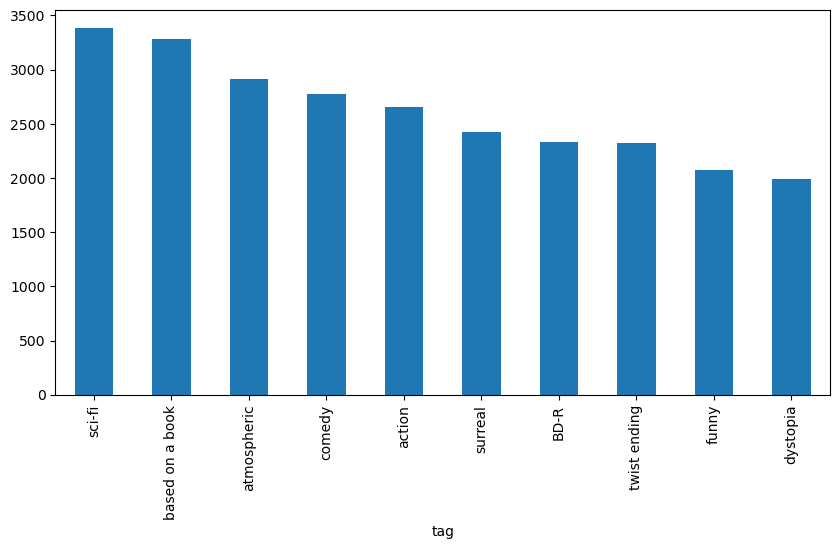

In [48]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

# &#127907; Filters for Selecting Rows

In [49]:
is_highly_rated = ratings['rating'] >= 5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [50]:
is_action= movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [51]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


# &#128101; Group By and Aggregate

In [55]:
ratings_count1 = ratings[['movieId','rating']].count()
ratings_count1

movieId    20000263
rating     20000263
dtype: int64

In [52]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [53]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [54]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [56]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


# &#128304; Merge Dataframes

In [57]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [58]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


* More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

### &#128218; Combine aggreagation, merging, and filters to get useful analytics

In [60]:
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [61]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [62]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [63]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [64]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


# &#128221; Vectorized String Operations

In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## &#128300; Split 'genres' into multiple columns 

In [66]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [67]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## &#128681; Add a new column for comedy genre flag 

In [68]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [69]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## &#128223; Extract year from title e.g. (2007) 

In [70]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [71]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods 

# &#128336; Parsing Timestamps

 * Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [80]:
tags = pd.read_csv(r'E:\MovielensLatest/tags.csv', sep=',')
tags

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841
...,...,...,...,...
753165,270854,132046,ineffective,1435014552
753166,270854,132046,visually appealing,1435014664
753167,270871,296,drugs,1426975036
753168,270871,296,exciting,1426975036


In [81]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Unix time / POSIX time / epoch time records time in seconds 

since midnight Coordinated Universal Time (UTC) of April 4, 2009

In [82]:
tags.head(5)

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


In [83]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

* Data Type datetime64[ns] maps to either

In [84]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [85]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,1,318,narrated,1425942391,2015-03-09 23:06:31
1,20,4306,Dreamworks,1459855607,2016-04-05 11:26:47


Selecting rows based on timestamps

In [86]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((753170, 5), (298820, 5))

Sorting the table using the timestamps

In [87]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
326442,120529,2788,monty python,1135429210,2005-12-24 13:00:10
326437,120529,1732,coen brothers,1135429236,2005-12-24 13:00:36
326434,120529,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
326433,120529,1193,jack nicholson,1135429371,2005-12-24 13:02:51
326449,120529,5004,peter sellers,1135429399,2005-12-24 13:03:19
326431,120529,47,brad pitt,1135429412,2005-12-24 13:03:32
326432,120529,47,morgan freeman,1135429412,2005-12-24 13:03:32
326446,120529,4011,brad pitt,1135429431,2005-12-24 13:03:51
326447,120529,4011,guy ritchie,1135429431,2005-12-24 13:03:51
326430,120529,32,bruce willis,1135429442,2005-12-24 13:04:02


# &#128199; Average Movie Ratings over Time

## Movie ratings related to the year of launch?

In [100]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
print(average_rating.tail())
print('-'*30)
print(average_rating)
# average_rating['movieId'] = average_rating['movieId'].str.extract('(\d+)')


       movieId  rating
26739   131254     4.0
26740   131256     4.0
26741   131258     2.5
26742   131260     3.0
26743   131262     4.0
------------------------------
       movieId    rating
0            1  3.921240
1            2  3.211977
2            3  3.151040
3            4  2.861393
4            5  3.064592
...        ...       ...
26739   131254  4.000000
26740   131256  4.000000
26741   131258  2.500000
26742   131260  3.000000
26743   131262  4.000000

[26744 rows x 2 columns]


In [109]:
average_rating.dtypes,average_rating.isna().sum()


(movieId      int64
 rating     float64
 dtype: object,
 movieId    0
 rating     0
 dtype: int64)

In [111]:
# Check for columns with non-numeric data types
non_numeric_columns = average_rating.select_dtypes(exclude=['int64', 'float64'])

# Check if the DataFrame contains non-numeric data
contains_non_numeric = not non_numeric_columns.empty
non_numeric_columns,contains_non_numeric

(Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
 
 [26744 rows x 0 columns],
 False)

In [112]:

joined = movies.merge(average_rating, on='movieId', how='inner').select_dtypes(['int64', 'float64'])


joined.head()


joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


# &#128170; Motivation

# **“Learning how to do data science is like learning to ski. You have to do it.”**
![Imgur](https://i.imgur.com/2sUbqv7.jpg)